In [2]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is inco

In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [14]:
class AgentState(TypedDict):
    message : str

def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message"""
    state['message'] = "Hey " + state["message"] + ", how is your day going ?"
    return state

In [16]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

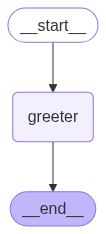

In [11]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
res = app.invoke({"message":"Raj"})

In [18]:
res["message"]

'Hey Raj, how is your day going ?'

In [19]:
def compliment(state: AgentState) -> AgentState:
    state["message"] = state["message"] + " , you are doing a great job"
    return state

In [20]:
graph = StateGraph(AgentState)
graph.add_node("compli", compliment)
graph.set_entry_point("compli")
graph.set_finish_point("compli")

app1 = graph.compile()

In [21]:
res1 = app1.invoke({"message": "Raj"})
res1["message"]

'Raj , you are doing a great job'

In [22]:
from typing import List

In [31]:
class AgenticState(TypedDict):
    values: List[int]
    name: str
    operation: str
    result: str

In [48]:
import math
def process_values(state: AgenticState) -> AgenticState:
    """This function handles multiple differnt inputs"""
    if state["operation"] == "+":
        total = sum(state["values"])
    else:
        total = math.prod(state["values"])
    state["result"] = f'Hi there {state["name"]}! Your total = {total}'
    return state

In [49]:
graph = StateGraph(AgenticState)
graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

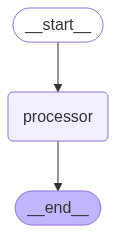

In [34]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [50]:
total = app.invoke({"values":[1,2,3,4,5], "name":"Raj", "operation" : "*"})

In [51]:
total["result"]

'Hi there Raj! Your total = 120'

In [57]:
class AgentState(TypedDict):
    name: str
    age: str
    skills: str
    final: str

In [64]:
def firstnode(state: AgentState) ->  AgentState:
    state["final"] = f'Hi {state["name"]} !'
    return state

def secondnode(state: AgentState) -> AgentState:
    state["final"] = state["final"] + f'You are {state["age"]} years old'
    return state

def thirdnode(state: AgentState) -> AgentState:
    state["final"] = state["final"] + f"Your skills are {state['skills']}"
    return state

In [65]:
graph = StateGraph(AgentState)
graph.add_node("firstnode", firstnode)
graph.add_node("secondnode", secondnode)
graph.add_node("thirdnode", thirdnode)

graph.set_entry_point("firstnode")
graph.add_edge("firstnode","secondnode")
graph.add_edge("secondnode", "thirdnode")
graph.set_finish_point("thirdnode")

app = graph.compile()

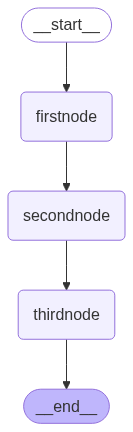

In [66]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [67]:
res = app.invoke({"name":"Raj", "age": "27", "skills":"python, genAI, devops"})
res["final"]

'Hi Raj !You are 27 years oldYour skills are python, genAI, devops'

In [68]:
from langgraph.graph import START, END

In [89]:
class AgentState(TypedDict):
    num1: int
    operation: str
    num2: int
    num3: int
    operation2: str
    num4: int
    final: int
    final2: int

In [94]:
def adder(state:AgentState) -> AgentState:
    state["final"] = state["num1"] + state["num2"]
    return state

def subtractor(state:AgentState) -> AgentState:
    state["final"] = state["num1"] - state["num2"]
    return state

def decide_next_node(state: AgentState) -> AgentState:
    if state["operation"] == "+":
        return "addition_op"
    elif state["operation"] == "-":
        return "subtract_op"

def adder2(state:AgentState) -> AgentState:
    state["final2"] = state["num3"] + state["num4"]
    return state

def subtractor2(state:AgentState) -> AgentState:
    state["final2"] = state["num3"] - state["num4"]
    return state

def decide_next_node2(state: AgentState) -> AgentState:
    if state["operation2"] == "+":
        return "addition_op2"
    elif state["operation2"] == "-":
        return "subtract_op2"

In [95]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state)
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_op": "add_node",
        "subtract_op": "subtract_node"
    }
)

graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_op2": "add_node2",
        "subtract_op2": "subtract_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()


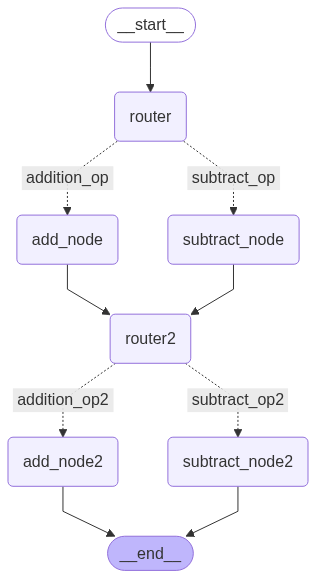

In [92]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [96]:
initial_state_1 = AgentState(num1 = 10, operation = "+", num2 = 5, num3 = 10, operation2 = "-", num4 = 5)
print(app.invoke(initial_state_1))

{'num1': 10, 'operation': '+', 'num2': 5, 'num3': 10, 'operation2': '-', 'num4': 5, 'final': 15, 'final2': 5}


In [8]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict

In [9]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [16]:
def greeting_node(state: AgentState)-> AgentState:
    """Greetings Node which says hi"""
    state["name"] = f"Hi there, {state['name']}"
    state["counter"] = 0

    return state

def random_node(state:AgentState) -> AgentState:
    """Generate the random number"""
    state["number"].append(random.randint(0,10))
    state["counter"] += 1

    return state

def should_continue(state: AgentState) -> AgentState:
    if state["counter"] < 5:
        print("Entering loop", state["counter"])
        return "loop"
    else:
        return "exit"
        


In [17]:
graph = StateGraph(AgentState)

graph.add_node("greeting",greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")

graph.add_conditional_edges(
    "random", #source node
    should_continue, #Action
    {
        "loop" : "random", #Self-loop back to same node
        "exit" : END #End of the graph
    }
)

graph.set_entry_point("greeting")
app = graph.compile()

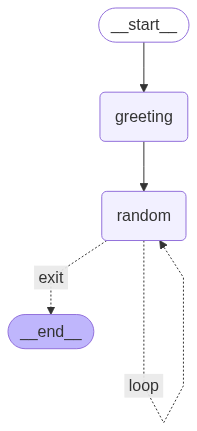

In [18]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
app.invoke({"name":"Raj","number":[20],"counter":-1})

Entering loop 1
Entering loop 2
Entering loop 3
Entering loop 4


{'name': 'Hi there, Raj', 'number': [20, 3, 4, 2, 2, 7], 'counter': 5}

In [47]:
class GameState(TypedDict):
    player_name: str
    target_number: int
    guesses: List[int]
    attempts: int
    hints: str
    lower_bound: int
    upper_bound:int

In [48]:
def setup_node(state: GameState) -> GameState:
    """Initialize the game with a random Target"""
    state["player_name"] = f"Welcome, {state['player_name']}"
    state["target_number"] = random.randint(1,20)
    state["guesses"] = []
    state["attempts"] = 0
    state["hint"] = "Try again my friend"
    state["lower_bound"] = 1
    state["upper_bound"] = 20
    print(f"{state['player_name']} The game has begun, I am thinking of a number between 1 and 20")
    return state

In [49]:
def guess_node(state: GameState) -> GameState:
    """Generate a smarter guess based on previous hints"""
    
    possible_guesses = [i for i in range(state["lower_bound"], state["upper_bound"] + 1) if i not in state["guesses"]]
    if possible_guesses:
        guess = random.choice(possible_guesses)
    else:
        
        guess = random.randint(state["lower_bound"], state["upper_bound"])
    
    state["guesses"].append(guess)
    state["attempts"] += 1
    print(f"Attempt {state['attempts']}: Guessing {guess} (Current range: {state['lower_bound']}-{state['upper_bound']})")
    return state

In [51]:
def hint_node(state: GameState) -> GameState:
    """Here we provide a hint based on the last guess and update the bounds"""
    latest_guess = state["guesses"][-1]
    target = state["target_number"]
    
    if latest_guess < target:
        state["hint"] = f"The number {latest_guess} is too low. Try higher!"
        
        state["lower_bound"] = max(state["lower_bound"], latest_guess + 1)
        print(f"Hint: {state['hint']}")
        
    elif latest_guess > target:
        state["hint"] = f"The number {latest_guess} is too high. Try lower!"
      
        state["upper_bound"] = min(state["upper_bound"], latest_guess - 1)
        print(f"Hint: {state['hint']}")
    else:
        state["hint"] = f"Correct! You found the number {target} in {state['attempts']} attempts."
        print(f"Success! {state['hint']}")
    
    return state

In [52]:
def should_continue(state: GameState) -> GameState:
    """Determine if we should continue guessing or end the game"""
    
    # There are 2 end conditions - either 7 is reached or the correct number is guessed
    latest_guess = state["guesses"][-1]
    if latest_guess == state["target_number"]:
        print(f"GAME OVER: Number found!")
        return "end"
    elif state["attempts"] >= 7:
        print(f"GAME OVER: Maximum attempts reached! The number was {state['target_number']}")
        return "end"
    else:
        print(f"CONTINUING: {state['attempts']}/7 attempts used")
        return "continue"

In [53]:
graph = StateGraph(GameState)
graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint_node", hint_node)
graph.add_edge("setup","guess")
graph.add_edge("guess","hint_node")

graph.add_conditional_edges(
    "hint_node",
    should_continue,
    {
        "continue": "guess",
        "end": END
    }
)
graph.set_entry_point("setup")
app = graph.compile()

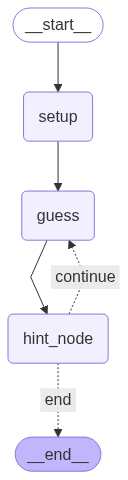

In [32]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [54]:
result = app.invoke({"player_name": "Raj", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20})

Welcome, Raj The game has begun, I am thinking of a number between 1 and 20
Attempt 1: Guessing 6 (Current range: 1-20)
Hint: The number 6 is too low. Try higher!
CONTINUING: 1/7 attempts used
Attempt 2: Guessing 14 (Current range: 7-20)
Hint: The number 14 is too high. Try lower!
CONTINUING: 2/7 attempts used
Attempt 3: Guessing 13 (Current range: 7-13)
Hint: The number 13 is too high. Try lower!
CONTINUING: 3/7 attempts used
Attempt 4: Guessing 8 (Current range: 7-12)
Success! Correct! You found the number 8 in 4 attempts.
GAME OVER: Number found!
